<a href="https://colab.research.google.com/github/gasoares23/IC/blob/main/Rhaul_Gabi_G2(PSO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-opt

best_x is [ 5.89752139 10.         -1.88238968 10.         -0.34467225  0.81200752
  2.06779211] best_y is [259.4589738]


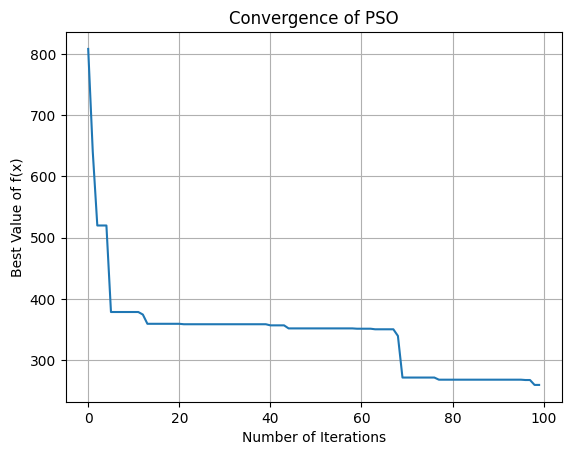

In [ ]:
import random
import numpy as np
from sko.PSO import PSO
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    x1, x2, x3, x4, x5, x6, x7 = x
    return (x1 - 10)**2 + 5*(x2 - 12)**2 + x3**4 + 3*(x4 - 11)**2 + 10*(x5**6) + 7*(x6**2) + x7**4 - 4*x6*x7 - 10*x6 - 8*x7

# Define the constraints
def restricao1(x):
    x1, x2, x3, x4, x5, x6, x7 = x
    return 127 - 2*(x1**2) - 3*(x2**4) - x3 - 4*(x4**2) - 5*(x5)

def restricao2(x):
    x1, x2, x3, x4, x5, x6, x7 = x
    return 282 - 7*(x1) - 3*(x2) - 10*(x3**2) - x4 + x5

def restricao3(x):
    x1, x2, x3, x4, x5, x6, x7 = x
    return 196 - 23*(x1) - x2**2 - 6*(x6**2) + 8*(x7)

def restricao4(x):
    x1, x2, x3, x4, x5, x6, x7 = x
    return 4*(x1**2) + x2**2 - 3*x1*x2 + 2*(x3**2) + 5*(x6) - 11*(x7)

# Define the penalty function
def penalty_function(x):
    return max(0, restricao1(x)) + max(0, restricao2(x)) + max(0, restricao3(x)) + max(0, restricao4(x))

def fitness_function(x):
    return objective_function(x) + penalty_function(x)

# Execute PSO
pso = PSO(func=fitness_function, n_dim=7, pop=50, max_iter=100,
          lb=[-10]*7, ub=[10]*7, w=0.8, c1=2, c2=2)
pso.run()

# Print the best result
print('best_x is', pso.gbest_x, 'best_y is', pso.gbest_y)

# Plot the convergence
plt.plot(pso.gbest_y_hist)
plt.xlabel('Number of Iterations')
plt.ylabel('Best Value of f(x)')
plt.title('Convergence of PSO')
plt.grid(True)
plt.show()